In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.graphics.api as smg
import statsmodels.formula.api as smf

sns.set_style('whitegrid')

## Graphics from the lesson

In [28]:
def logit(x,beta0,beta1):
    import numpy as np
    y = beta0 + beta1 * x
    return np.exp(y) / (1 + np.exp(y))

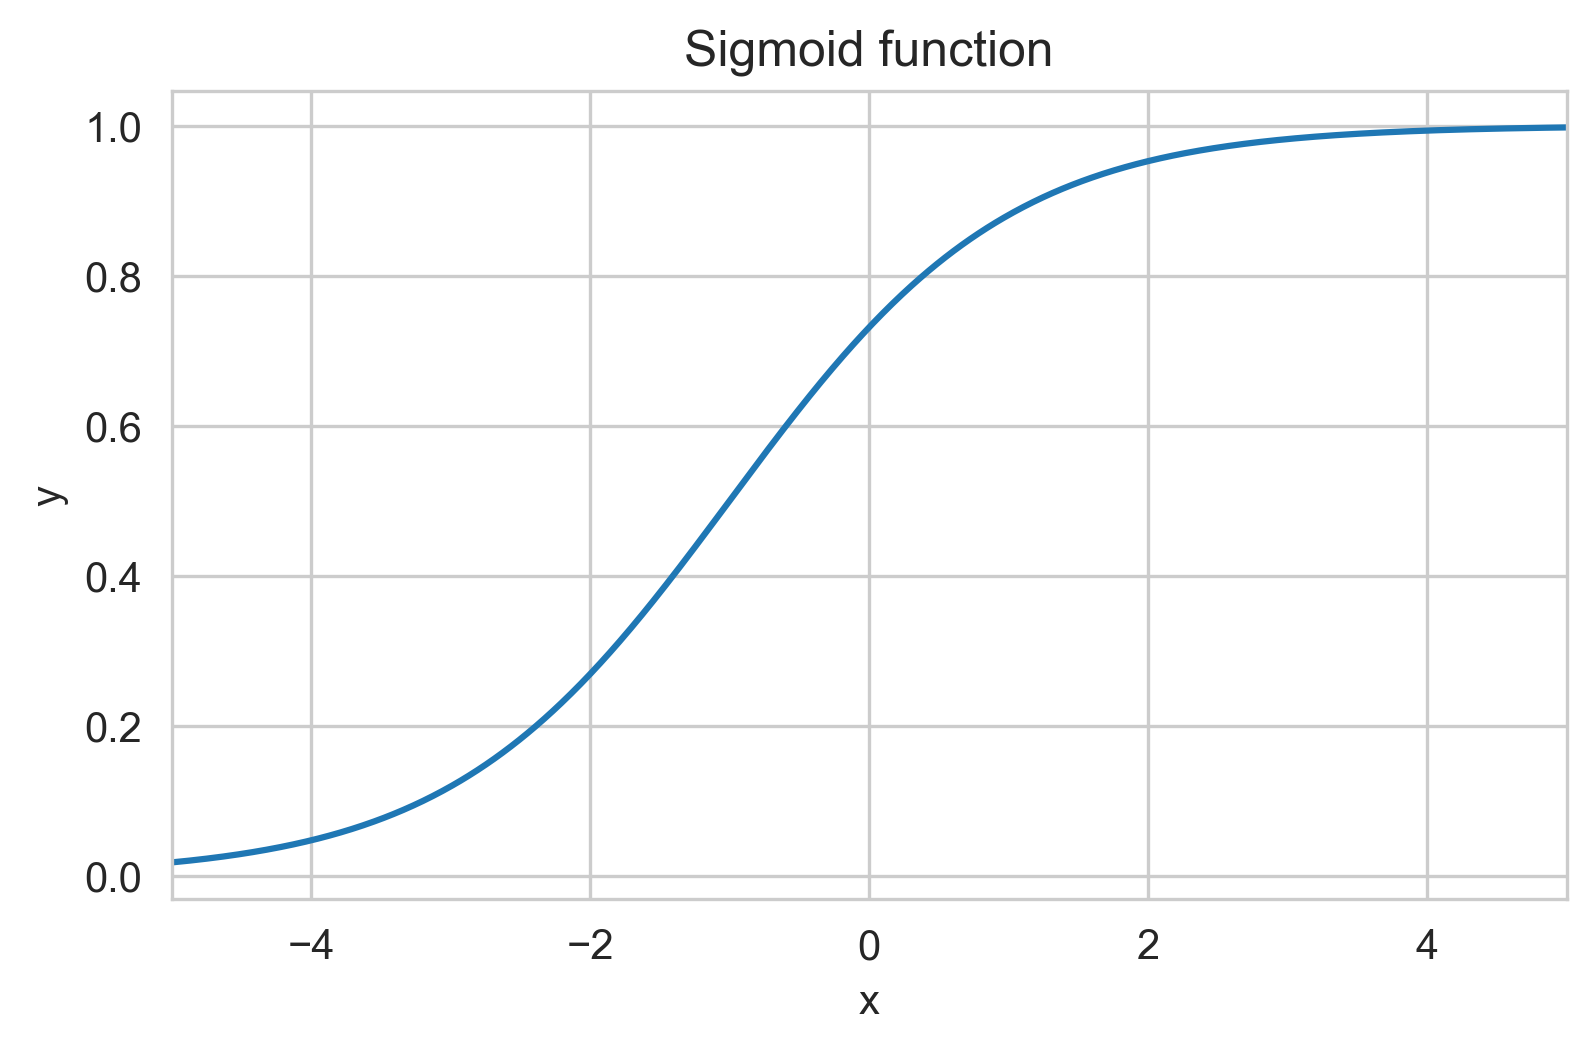

In [29]:
fig, ax = plt.subplots(figsize=(6,3.5))
x_rng = np.linspace(-5,5,1000)
sigmoid = [logit(xx,1,1) for xx in x_rng]
ax.plot(x_rng, sigmoid)
ax.set_xlim(-5,5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Sigmoid function')
fig.set_dpi(300)
plt.show()

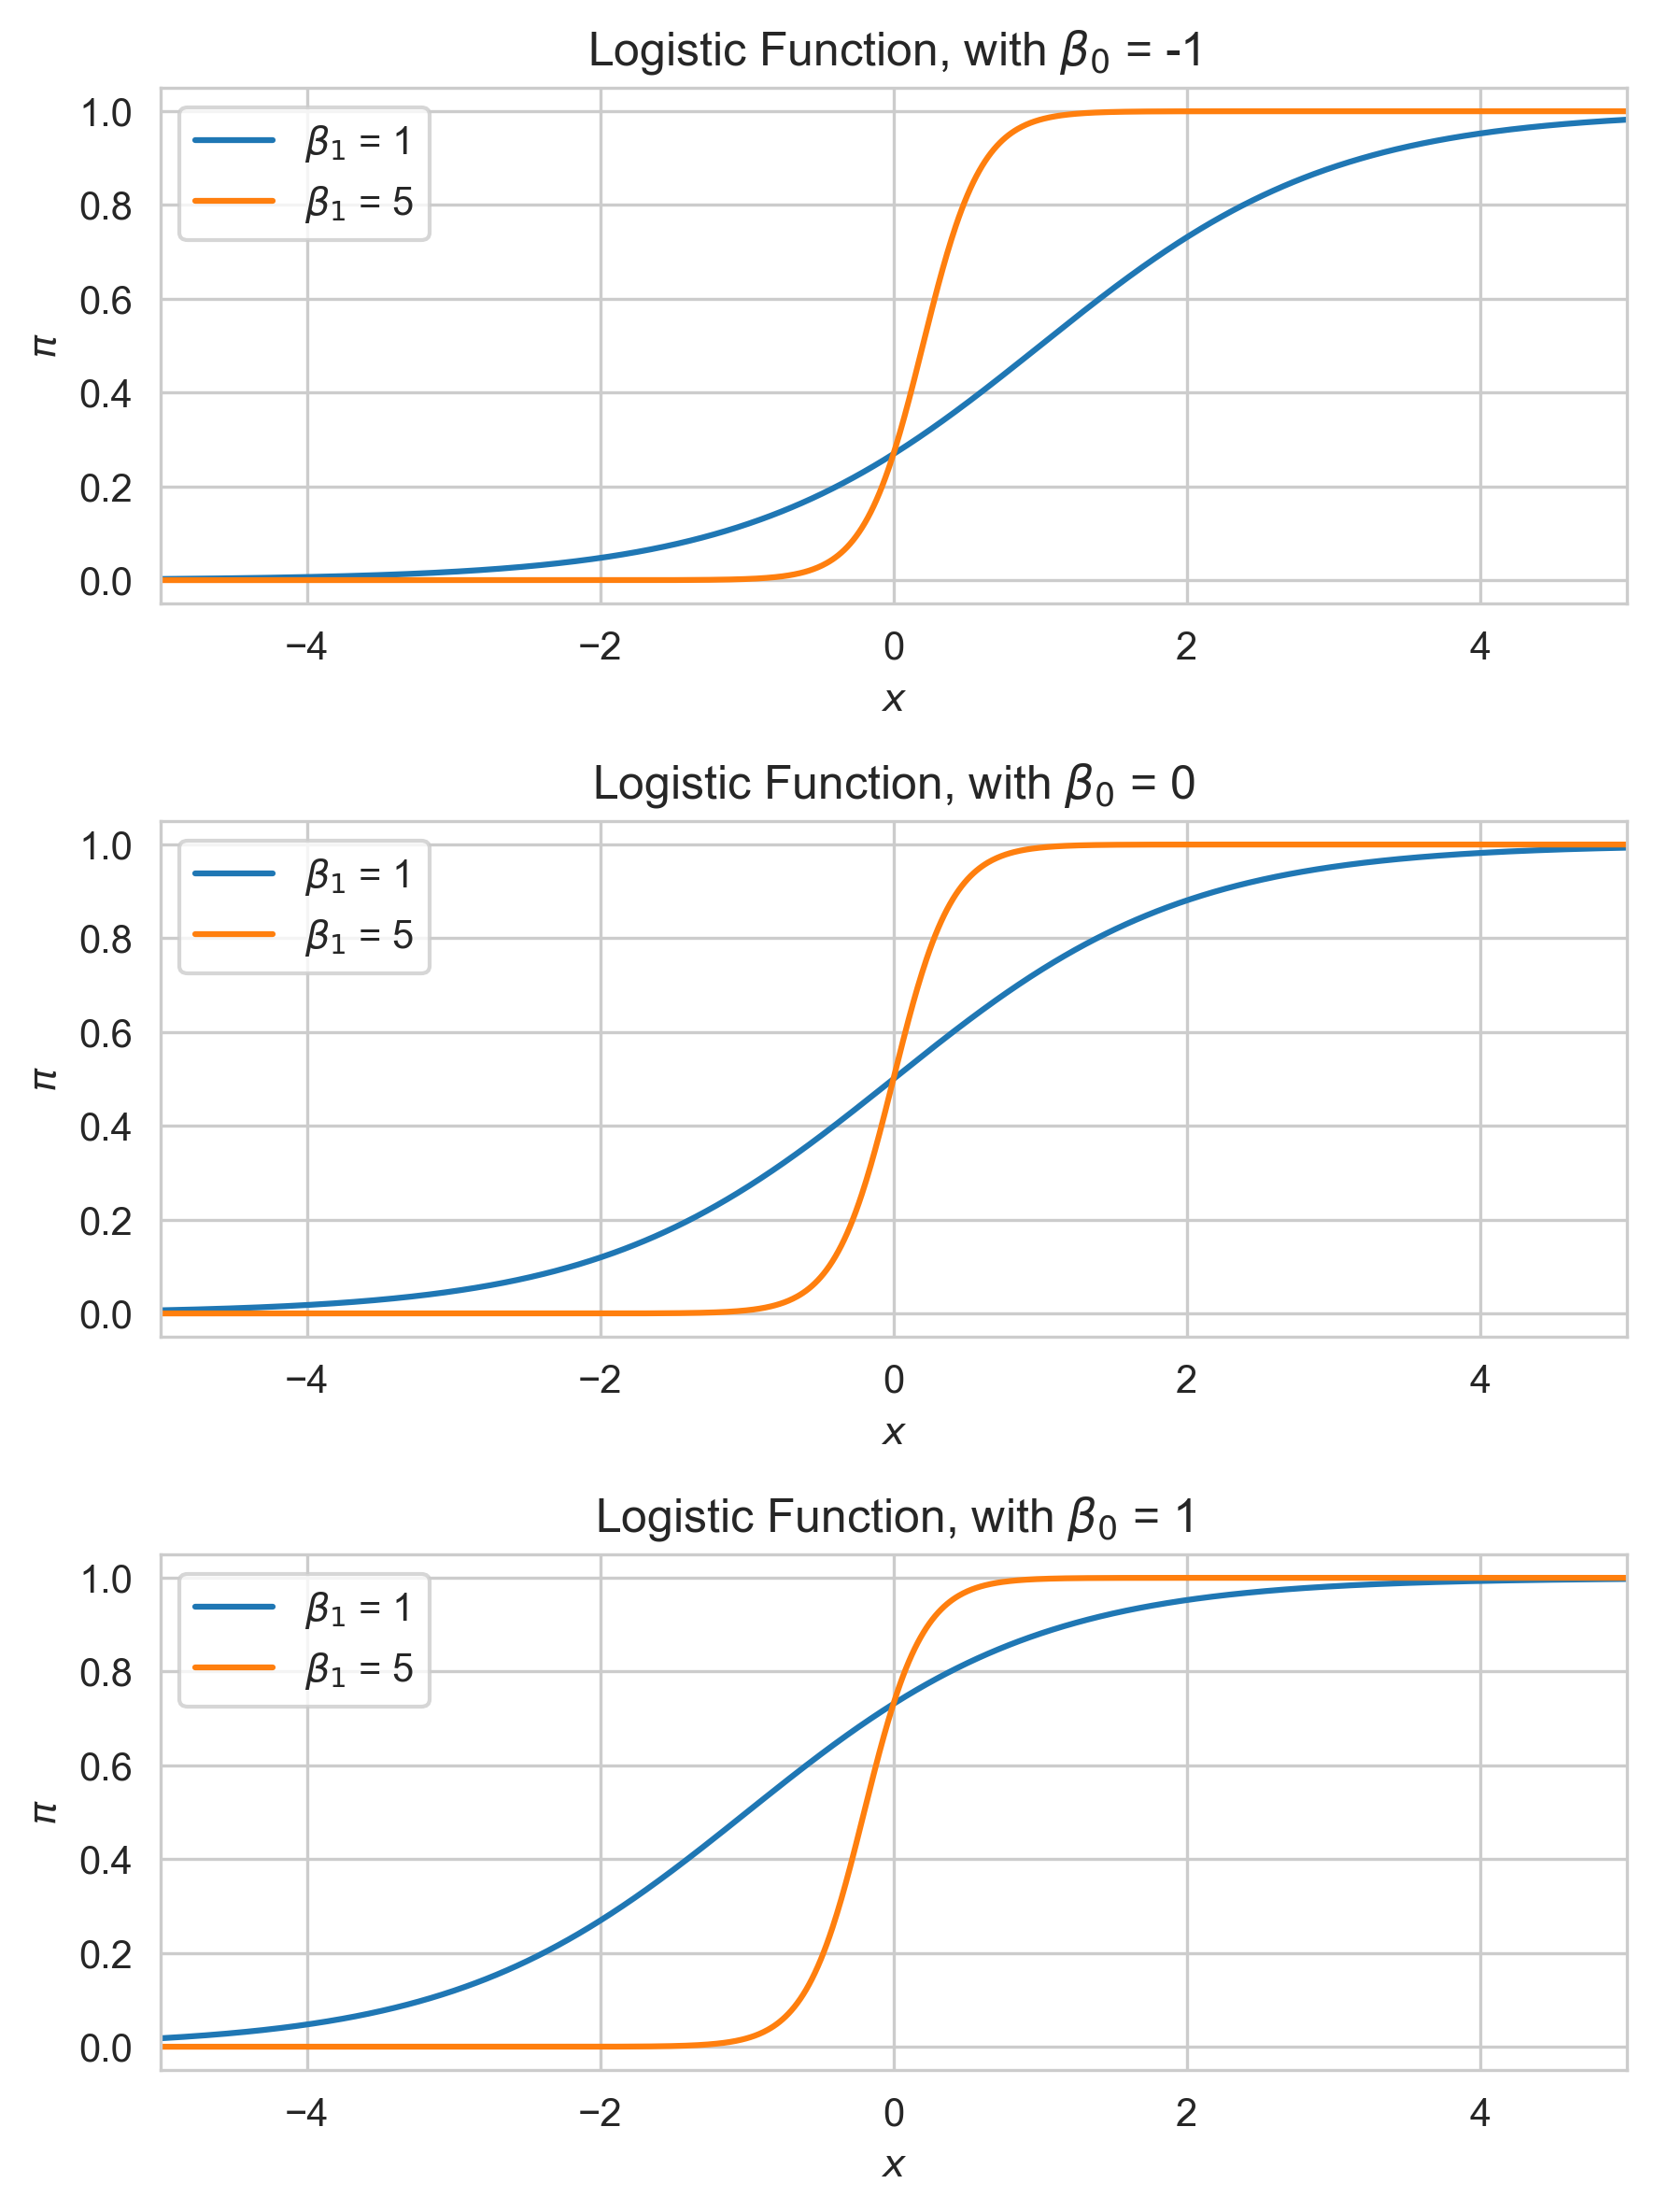

In [30]:
beta0_lst = [-1,0,1]
n = 1000
x_rng = np.linspace(-5,5,n)
beta1_lst = [1,5]

fig, ax = plt.subplots(len(beta0_lst),1,figsize=(6,8))
for ii in range(len(beta0_lst)):
    beta0 = beta0_lst[ii]
    for beta1 in beta1_lst:
        logistic = [logit(xx,beta0,beta1) for xx in x_rng]
        ax[ii].plot(x_rng,logistic,label=r'$\beta_1$ = ' + f'{beta1}')
    ax[ii].set_xlabel('$x$')
    ax[ii].set_ylabel('$\pi$')
    ax[ii].set_title(r'Logistic Function, with $\beta_0$ = ' + f'{beta0}')
    ax[ii].set_xlim(-5,5)
    ax[ii].legend()
fig.tight_layout()
fig.set_dpi(300)
plt.show()

## Challenger Data

In [31]:
chal = pd.read_csv('challenger.csv')
chal.head()

,Temperature,Failure
0,66,0
1,70,1
2,69,0
3,68,0
4,67,0


In [32]:
model = smf.logit(formula='Failure ~ Temperature', data=chal).fit()
model.summary2()

Optimization terminated successfully.
         Current function value: 0.441635
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.281    
Dependent Variable: Failure          AIC:              24.3152  
Date:               2022-12-07 11:09 BIC:              26.5862  
No. Observations:   23               Log-Likelihood:   -10.158  
Df Model:           1                LL-Null:          -14.134  
Df Residuals:       21               LLR p-value:      0.0048035
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
-----------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-----------------------------------------------------------------
Intercept    15.0429    7.3786   2.0387  0.0415   0.5810  29.5048
Temperature  -0.2322    0.1082  -2.1450  0.0320  -0.4443  -0.0200
================================================================

"""

## GRE data

In [33]:
gre = pd.read_csv('GRE.csv')
gre.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


We'll do a train/test split this time (no validation) to demonstrate.

In [34]:
from sklearn.model_selection import train_test_split
X = gre.drop('admit', axis=1)
y = gre['admit']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0)

In [35]:
model = smf.logit('admit ~ gre + gpa + rank', X_train.join(y_train)).fit()
model.summary2()

Optimization terminated successfully.
         Current function value: 0.572996
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.084     
Dependent Variable: admit            AIC:              328.8776  
Date:               2022-12-07 11:09 BIC:              343.4167  
No. Observations:   280              Log-Likelihood:   -160.44   
Df Model:           3                LL-Null:          -175.07   
Df Residuals:       276              LLR p-value:      1.9757e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -2.6918    1.3329  -2.0195  0.0434  -5.3042  -0.0793
gre            0.0013    0.0013   0.9875  0.3234  -0.0012   0.0038
gpa            0.8002    0.3845   2.0808  0.0375   0.0465   1.5539
rank          -0.6607    0.1555  -4.2499  0.0000  -0.9655  -0.3560
=================================================================

"""

## Assessing Adequacy

Studentized Pearson residuals: 

$r_{P_i} = \frac{Y_i - \hat{\pi}_i}{\sqrt{\hat{\pi}_i(1-\hat{\pi}_i)}} = \frac{Y_i - E[Y]}{\sqrt{Var[Y]}}$

for Y distributed as a Bernoulli random trial.

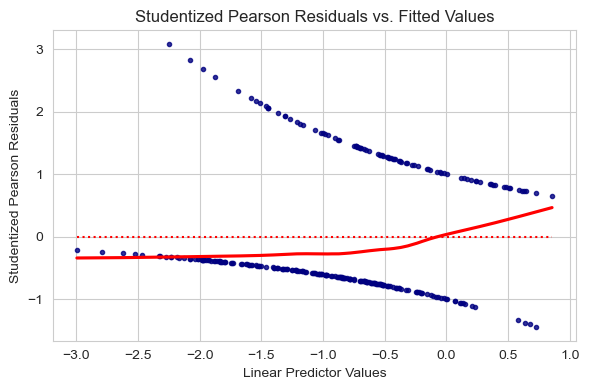

In [36]:
fig, ax = plt.subplots(figsize=(6,4))
sns.regplot(x=model.fittedvalues, y=model.resid_pearson, ax=ax,
            color='navy', line_kws={'color':'red'}, 
            marker='.', lowess=True
           )
ax.plot([min(model.fittedvalues), max(model.fittedvalues)],
        [0,0], color='red', ls=':'
       )
ax.set_xlabel('Linear Predictor Values')
ax.set_ylabel('Studentized Pearson Residuals')
ax.set_title('Studentized Pearson Residuals vs. Fitted Values')
fig.tight_layout()
plt.show()

Deviance residuals:

$dev_i = sign(y-\hat{\pi}_i)\sqrt{-2 Y_i \ln{(\hat{\pi}_i)} + (1 - Y_i)\ln{(1-\hat{\pi}_i)}}$

This one is based on likelihood measure, which is thoroughly rooted in calculus.

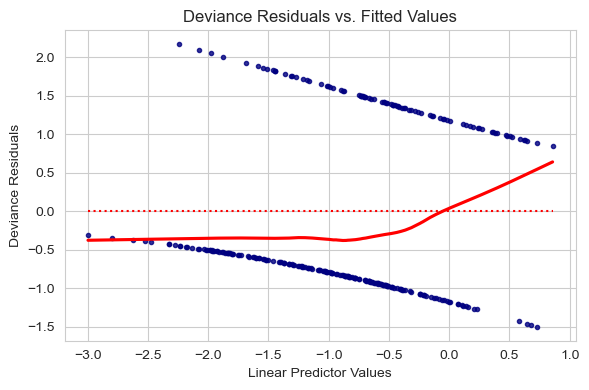

In [37]:
fig, ax = plt.subplots(figsize=(6,4))
sns.regplot(x=model.fittedvalues, y=model.resid_dev, ax=ax,
            color='navy', line_kws={'color':'red'}, 
            marker='.', lowess=True
           )
ax.plot([min(model.fittedvalues), max(model.fittedvalues)],
        [0,0], color='red', ls=':'
       )
ax.set_xlabel('Linear Predictor Values')
ax.set_ylabel('Deviance Residuals')
ax.set_title('Deviance Residuals vs. Fitted Values')
fig.tight_layout()
plt.show()

## Accuracy: Applying to test set

In [38]:
# Confusion matrix
print(model.pred_table())

[[178.  13.]
 [ 67.  22.]]


In [39]:
# Predictions: This gives us estimated probabilities
model.predict(X_test)

132    0.363319
309    0.150024
341    0.136216
196    0.200230
246    0.381581
         ...   
216    0.353635
259    0.460774
49     0.184100
238    0.082000
343    0.303002
Length: 120, dtype: float64

These are potentially useful, but if we want to make a prediction, we'll use a cutoff. The most obvious is 0.5, but you may adjust this.

In [40]:
pred = model.predict(X_test).apply(lambda xx: 1 if (xx >= 0.5) else 0)

In [41]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred))

[[78  4]
 [28 10]]


We could adjust the cutoff to improve our false negative rate at the trade-off of lowering our true positive rate, or vice versa.

In [42]:
pred2 = model.predict(X_test).apply(lambda xx: 1 if (xx >= 0.3) else 0)
print(confusion_matrix(y_test, pred2))

[[48 34]
 [13 25]]


In [43]:
pred3 = model.predict(X_test).apply(lambda xx: 1 if (xx >= 0.7) else 0)
print(confusion_matrix(y_test, pred3))

[[82  0]
 [38  0]]


### Classification Report

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83        82
           1       0.71      0.26      0.38        38

    accuracy                           0.73       120
   macro avg       0.73      0.61      0.61       120
weighted avg       0.73      0.73      0.69       120



### ROC Curves

In [46]:
from sklearn.metrics import roc_auc_score, roc_curve

In [47]:
# Area under the curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print(logit_roc_auc)

0.6813222079589218


In [48]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))

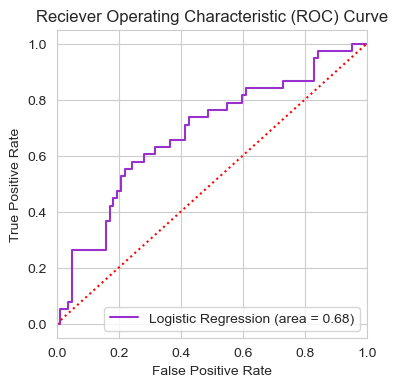

In [49]:
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(fpr, tpr, color='darkorchid',
        label=f'Logistic Regression (area = {logit_roc_auc:.2f})'
       )
ax.plot([0,1],[0,1], color='red', ls=':')
ax.set_xlim([0,1])
ax.set_ylim([-0.05,1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Reciever Operating Characteristic (ROC) Curve')
ax.legend()
plt.show()

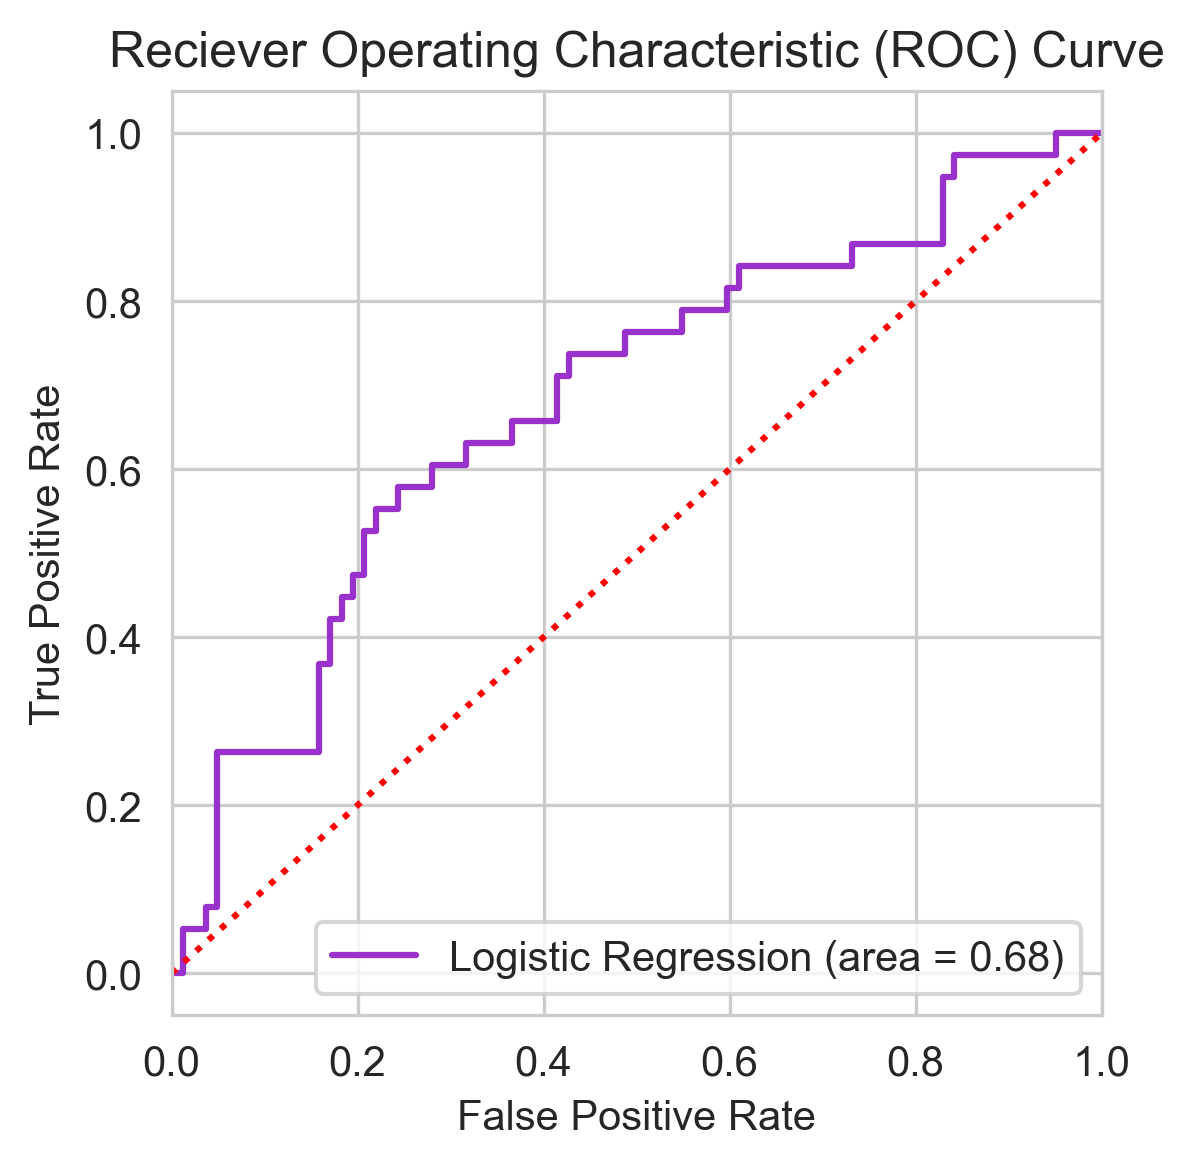

In [50]:
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(fpr, tpr, color='darkorchid',
        label=f'Logistic Regression (area = {logit_roc_auc:.2f})'
       )
ax.plot([0,1],[0,1], color='red', ls=':')
ax.set_xlim([0,1])
ax.set_ylim([-0.05,1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Reciever Operating Characteristic (ROC) Curve')
ax.legend()
fig.set_dpi(300)
plt.show()